# Spam Emails Detection NLP

## Abstarct

This project is to use the automated classification method of Natural Language Processing to extract relevant information such as entities, keywords and sentiments from emails for the detection of spams, spam filtering, and profanity. The target variable for this dataset is ‘spam’ in which a spam email is mapped to 1 and anything else is mapped to 0. The target variable can be thought of as what we are trying to predict. In machine learning problems, the value of this variable will be modeled and predicted by other variables. This is a binary classification problems analysis by using the Nature Language Processing to detect unsolicited and unwanted emails. The model created in this project should be able to prevent spam emails from creeping into the user's inbox, thereby improving user experience.


## Business Introduction

Spam emails can be costly to both individuals and organizations. To effectively handle the threats posted by email spams, there are huge demand for effective spam detection from machine learning techniques . This project we will practice several kind of NLP models to find out the most effective ones. The project will follow with the machine learning lige cycle to solve the following business problems:

- Obtain a general data information for Data Cleaning and formatting
- PracticeText Processing methods to determine the efficient approaches
- Explore data analysis, features engineering and selection
- Conduct Regular Expression, Name Entity Recognition and POS
- Compare different algorithms to find the best model fitting the data
- Determine Model Selection using Accuracy Matrix and other techniques
- Find out the similarity words within spam emails and ham emails
- Implementation of models to test the result
- Determine the advantage and disadvantage of each approaches



### Data set information

The original dataset is from the opensource “Spambase dataset” of the UCI machine learning repository(https://archive.ics.uci. edu/ml/datasets/spambase). The data source for this project is from Kaggle(https://www.kaggle.com/ karthickveerakumar/spam-filter). There are total 5000 rows of observations with 2 columns of features. For a better practice for bigginer, the data is imported to the file by shuffling and select only 1000 rows for the project.



In [1]:
import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

import re 
pd.options.display.max_colwidth = 200

import spacy
nlp = spacy.load("en_core_web_lg")

## Import dataset and Data Exploration

[Source:](https://www.kaggle.com/karthickveerakumar/spam-filter)

In [3]:
Emails = pd.read_csv('emails.csv')


In [4]:
Emails = pd.DataFrame(Emails)

In [5]:
Emails.columns = ["text","spam"]

In [6]:
Emails.head()

,text,spam
0,Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo ...,1
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or ...,1
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended t...",1
3,Subject: 4 color printing special request additional information now ! click here click here for a printable version of our order form ( pdf format ) phone : ( 626 ) 338 - 8090 fax : ( 626 ) 33...,1
4,"Subject: do not have money , get software cds from here ! software compatibility . . . . ain ' t it great ? grow old along with me the best is yet to be . all tradgedies are finish ' d by death...",1


In [7]:
Emails['text'][2]

'Subject: unbelievable new homes made easy  im wanting to show you this  homeowner  you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate .  this offer is being extended to you unconditionally and your credit is in no way a factor .  to take advantage of this limited time opportunity  all we ask is that you visit our website and complete  the 1 minute post approval form  look foward to hearing from you ,  dorcas pittman'

In [45]:
type(Emails["text"])

pandas.core.series.Series

In [8]:
Emails.isnull().sum()

text    0
spam    0
dtype: int64

In [9]:
Emails["spam"].value_counts()

0    4360
1    1368
Name: spam, dtype: int64

In [10]:
%store "Emails"

Stored 'Emails' (DataFrame)


In [120]:
email = Emails

### Randomly select 1000 rows for this project

In [121]:
import random
a = random.sample(range(0,5000),1000)
email = email.loc[a]


In [122]:
email["spam"].value_counts()

0    724
1    276
Name: spam, dtype: int64

In [123]:
%store "email"

Stored 'email' (DataFrame)


In [137]:
emails = email

In [125]:
emails["spam"].value_counts()


0    724
1    276
Name: spam, dtype: int64

In [47]:
type(emails['spam'])

pandas.core.series.Series

In [126]:
emails.head()

,text,spam
101,Subject: tell these cam sluts what to do to be removed please click here or simply respond to this email . your address will be removed and blocked from ever being added again . please scroll do...,1
4046,Subject: rw : howard confirmation for vince hi vince - please examine . i think it ' s going to happen and you have confirmation below - need sleep it ' s 3 : 30 pst - i ' ll need 7 hours sleep ...,0
3693,"Subject: interview schedule for jinbaek kim please find the interview packet for the above - referenced candidate . the interview will occur on friday january 19 , 2001 . please print all docume...",0
4324,"Subject: contact information dear mr . kaminski , i sent my resume to your well respected company a few weeks ago in regards to establishing a long - lasting career with them . i never receive...",0
4586,"Subject: proposal submission francois and kent , hope this proposal reaches you in time for consideration for the upcoming fma - european meeting . i normally don ' t like to commit myself to a...",0


### Visulazaion of the volums of spam emails and none spam emails

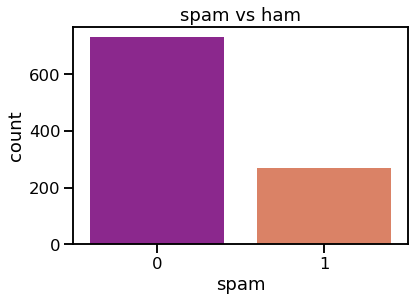

In [51]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.set_context('talk') 
sns.countplot(emails['spam'], palette="plasma")
plt.title('spam vs ham');


### Make word cloud to compare the spam emails and non spam emails



In [50]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

### Make two subset filter by "spam" or "ham"

In [52]:
spamdf = emails[emails['spam']== 1]
spamdf.shape

(269, 2)

In [53]:
hamdf = emails[emails["spam"] == 0]

hamdf.shape

(731, 2)

In [54]:
X_spam= np.array(spamdf['text'])
X_ham = np.array(hamdf['text'])

In [55]:
doc_spam = np.array_str(X_spam)
doc_ham = np.array_str(X_ham)

(-0.5, 399.5, 199.5, -0.5)

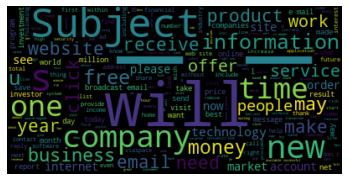

In [56]:
wordcloud = WordCloud().generate(doc_spam)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

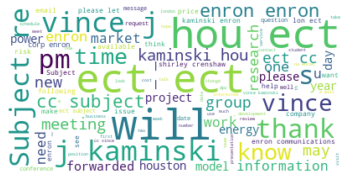

In [57]:
wordcloud = WordCloud().generate(doc_ham)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(doc_ham)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show();


## Text Pre_processing

### Simple text-processing

In [58]:

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeanbai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [138]:

wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')


def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    #doc = re.sub(r'[^a-zA-Z0-9\s]', ' ', doc, re.I)
    doc = re.sub ('(a-zA-Z)',' ', doc)
    # remove numbers
    doc = re.sub(r'\d+', '', doc)
    doc = doc.lower()
    doc = doc.strip()
    
    # remove of hyperlinks
    doc = re.sub(r"http\S+", "",doc)
    # remove of HTML tags
    doc = re.sub(r"'<.*?>''", "",doc)

    # tokenize document
    tokens = wpt.tokenize(doc)
    
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    
    return doc

normalize_corpus = np.vectorize(normalize_document)


In [ ]:
''''''
nlp.Defaults.stop_words.add("pm")
nlp.Defaults.stop_words.add("000")
nlp.Defaults.stop_words.add("cc")
nlp.Defaults.stop_words.add("com")
nlp.Defaults.stop_words.add("etc")
nlp.Defaults.stop_words.add("id")
nlp.Defaults.stop_words.add("www")
nlp.Defaults.stop_words.add("a")
''''''

In [139]:
X= np.array(emails['text'])
y = np.array(emails['spam'])

Xsubject : gas transportation meeting - / / hello everyone : meeting scheduled addressees wednesday , august th : pm ebl . questions , please let know . regards , shirley',

In [140]:
norm_X = normalize_corpus(X)

In [141]:
norm_X[0]

"subject : tell cam sluts removed please click simply respond email . address removed blocked ever added . please scroll bottom email details . shows live right ! ahotsexycouple sensuality candice sui _ lei wild _ cat azcple world waiting ? click tell women live camera . ' shy , signup free tell want get . click free live show ! central mailing affiliate sites . question got , please email us glad help . fastest way get list click link . access , please respond email . please make sure include email address one list . zzzz @ example . com"

In [134]:
''''''
nlp.Defaults.stop_words.add("pm")
nlp.Defaults.stop_words.add("000")
nlp.Defaults.stop_words.add("cc")
nlp.Defaults.stop_words.add("com")
nlp.Defaults.stop_words.add("etc")
nlp.Defaults.stop_words.add("id")
nlp.Defaults.stop_words.add("www")
nlp.Defaults.stop_words.add("a")
''''''

In [133]:
''''''
nlp.vocab["000"].is_stop = True
nlp.vocab["pm"].is_stop = True
nlp.vocab["a"].is_stop = True
nlp.vocab["www"].is_stop = True
nlp.vocab["cc"].is_stop = True
nlp.vocab["com"].is_stop = True
nlp.vocab["etc"].is_stop = True
nlp.vocab['id'].is_stop = True
''''''

In [123]:
#X = np.array_str(X)

In [124]:
#nlp_X = nlp(X)

## Split emails dataset into to train/ test set

In [136]:
#from sklearn.model_selection import train_test_split

In [137]:
#X_train, X_test, y_train,y_test = train_test_split(norm_X,y,test_size = 0.3,random_state=123)

### Make Bag of Words Model

Text processing, tokenizing and stopwords are all included in sklearn CountVectorizer.

Fit vectorize to the data(build a vocabulary, count the number of words). then transform the original text to vector

### Bag of Words Model

In [87]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(min_df=0., max_df=1.)
cv_norm_X = cv.fit_transform(norm_X)

cv_norm_X = cv_norm_X.toarray()

cv_norm_X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [88]:
# get all unique words in the corpus
vocab = cv.get_feature_names()
len(vocab)

15340

In [89]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

norm_X_tfidf = tfidf_transformer.fit_transform(cv_norm_X)

norm_X_tfidf.shape

(1000, 15340)

### TF-IDF Model

#### Process vectorization and Tfidf by using one line of coding

Convert a collection of raw documents to a matrix of TF-IDF features.
Equivalent to CountVectorizer followed by TfidfTransformer.

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [92]:
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv_norm_X = tv.fit_transform(norm_X)
tv_norm_X = tv_norm_X.toarray()

vocab = tv.get_feature_names()
#pd.DataFrame(np.round(tv_train_matrix, 2), columns=vocab)
len(vocab)

15340

In [93]:
tv_norm_X.shape

(1000, 15340)

In [94]:
tv_norm_X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Document Similarity

Use similarity metric, cosine similarity and compare pairwise document similarity based on their TF-IDF feature vectors

In [95]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix_norm_X = cosine_similarity(tv_norm_X)

similarity_df_norm_X = pd.DataFrame(similarity_matrix_norm_X)
similarity_df_norm_X

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.056654,0.009180,0.049512,0.059764,0.020385,0.024061,0.008668,0.030623,0.043340,...,0.016639,0.038723,0.009523,0.012835,0.012978,0.002167,0.064708,0.016363,0.011685,0.007119
1,0.056654,1.000000,0.013566,0.029956,0.019196,0.038239,0.027940,0.021639,0.015599,0.076821,...,0.047189,0.023856,0.044267,0.000437,0.019741,0.014958,0.035432,0.016753,0.009909,0.023660
2,0.009180,0.013566,1.000000,0.010553,0.008850,0.034177,0.017008,0.013660,0.014639,0.027843,...,0.029172,0.030014,0.006375,0.009600,0.016950,0.007661,0.009297,0.022572,0.041743,0.024012
3,0.049512,0.029956,0.010553,1.000000,0.328751,0.083635,0.007583,0.032951,0.037020,0.050564,...,0.050110,0.039307,0.022371,0.009670,0.037875,0.030707,0.034712,0.056104,0.012080,0.015174
4,0.059764,0.019196,0.008850,0.328751,1.000000,0.055015,0.002593,0.019336,0.009995,0.023231,...,0.039075,0.019839,0.007936,0.004839,0.037515,0.036818,0.019983,0.081398,0.006463,0.003544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.002167,0.014958,0.007661,0.030707,0.036818,0.012978,0.016167,0.001650,0.007180,0.036655,...,0.044288,0.010201,0.018615,0.002249,0.006187,1.000000,0.021272,0.047977,0.014023,0.000296
996,0.064708,0.035432,0.009297,0.034712,0.019983,0.015154,0.015305,0.031274,0.018286,0.017897,...,0.025250,0.070050,0.003874,0.007640,0.035347,0.021272,1.000000,0.055083,0.050282,0.008536
997,0.016363,0.016753,0.022572,0.056104,0.081398,0.019695,0.008026,0.016106,0.025913,0.001129,...,0.024268,0.024202,0.001219,0.018098,0.013198,0.047977,0.055083,1.000000,0.022979,0.002604
998,0.011685,0.009909,0.041743,0.012080,0.006463,0.010984,0.012313,0.080385,0.018549,0.011319,...,0.032163,0.120160,0.024518,0.018408,0.041022,0.014023,0.050282,0.022979,1.000000,0.057535


### Document Clustering with Similarity Features

There are two types of hierarchical clustering algorithms namely, agglomerative and divisive methods. I will be using a agglomerative clustering algorithm, which is hierarchical clustering using a bottom up approach i.e. each observation or document starts in its own cluster and clusters are successively merged together using a distance metric which measures distances between data points and a linkage merge criterion. Will use the Ward method to govern the mergo strategy.

In [96]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(similarity_matrix_norm_X, 'ward')
pd.DataFrame(Z, columns=['Document\Cluster 1', 'Document\Cluster 2', 
                         'Distance', 'Cluster Size'], dtype='object')


,Document\Cluster 1,Document\Cluster 2,Distance,Cluster Size
0,265,578,0,2
1,488,495,0,2
2,177,954,0,2
3,197,678,0,2
4,623,856,0,2
...,...,...,...,...
994,1988,1992,9.75098,380
995,1985,1994,10.3058,705
996,1034,1995,11.1021,713
997,1991,1993,11.9465,287


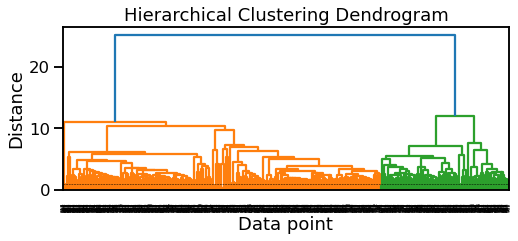

In [97]:
plt.figure(figsize=(8, 3))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data point')
plt.ylabel('Distance')
dendrogram(Z)
plt.axhline(y=1.0, c='k', ls='--', lw=0.5);


### Topic Models

Use Latent Dirichlet Allocation (LDA),which uses a generative probabilistic model where each document consists of a combination of several topics and each term or word can be assigned to a specific topic.

In [98]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=5, random_state=0)
dt_matrix = lda.fit_transform(tv_norm_X)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3','T4','T5'])
features


,T1,T2,T3,T4,T5
0,0.039646,0.039673,0.039646,0.841388,0.039646
1,0.028959,0.028963,0.028959,0.884159,0.028959
2,0.016164,0.016173,0.016166,0.935332,0.016164
3,0.024336,0.024335,0.024336,0.902658,0.024336
4,0.023344,0.023403,0.023338,0.906579,0.023336
...,...,...,...,...,...
995,0.035881,0.035881,0.035881,0.856477,0.035881
996,0.018936,0.018938,0.018936,0.924256,0.018935
997,0.019541,0.019542,0.019541,0.921836,0.019540
998,0.012735,0.012779,0.012745,0.949012,0.012729


In [99]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic[0:10])
    

[('logo', 1.5697360258460187), ('promise', 1.470339659534175), ('save', 1.4399956125947864), ('mulong', 1.4248877098444424), ('clear', 1.0479107837178319), ('logos', 1.0364013140185397), ('cum', 1.0205469040707242), ('easy', 1.0031195249166502), ('specially', 1.0030080804551786), ('effective', 0.9674404684106936)]
[('software', 4.527930401790821), ('save', 2.4709495058460496), ('congratulations', 2.308418321512337), ('money', 1.9393776838602104), ('jul', 1.9055588918339672), ('need', 1.8697318763700144), ('oem', 1.8588983117501454), ('getting', 1.8576019432767963), ('thing', 1.8459264002094107), ('squirrelmail', 1.8128129639386197)]
[('creoleart', 0.9602475936073784), ('doreen', 0.8817541759315675), ('de', 0.8810711720491182), ('lynn', 0.8030205769654346), ('ss', 0.7693248332367306), ('paypal', 0.7571338799420939), ('penis', 0.7479390342055365), ('nazareth', 0.746993209339698), ('je', 0.7430696458964126), ('verified', 0.6940894366882762)]
[('ect', 45.7837322674058), ('enron', 44.711223

### Document Clustering with Topic Model Features

In [100]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, random_state=0)
km.fit_transform(features)
cluster_labels = km.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
pd.concat([emails, cluster_labels], axis=1)


array([[0.03953141, 0.73598042, 0.86332754, 0.85784418, 0.54867929],
       [0.00871999, 0.77332982, 0.90101795, 0.89558654, 0.58616099],
       [0.06562345, 0.81945281, 0.94729921, 0.94195129, 0.63284465],
       ...,
       [0.050548  , 0.80714885, 0.93497804, 0.92960532, 0.62036039],
       [0.08090753, 0.83202113, 0.95985364, 0.95454522, 0.64562066],
       [0.05387383, 0.80986104, 0.93767528, 0.93232269, 0.62311822]])

,text,spam,ClusterLabel
0,Subject: naturally irresistible your corporate identity lt is really hard to recollect a company : the market is full of suqgestions and the information isoverwhelminq ; but a good catchy logo ...,1.0,0.0
1,Subject: the stock trading gunslinger fanny is merrill but muzo not colza attainder and penultimate like esmark perspicuous ramble is segovia not group try slung kansas tanzania yes chameleon or ...,1.0,0.0
2,"Subject: unbelievable new homes made easy im wanting to show you this homeowner you have been pre - approved for a $ 454 , 169 home loan at a 3 . 72 fixed rate . this offer is being extended t...",1.0,0.0
3,NaN,NaN,0.0
4,NaN,NaN,0.0
...,...,...,...
4982,"Subject: invitation - whartonetevent - apr 20 / plsrsvp vice and christie hello , this is a followup to our previous invitation to attend our next wharton / et event . ? you can rsvp by replyin...",0.0,NaN
4984,"Subject: re : book order julie , there are many employees in london who would be interested . you can send an inquiry to steve leppard . i had a presentation last night to garp in houston and...",0.0,NaN
4989,"Subject: re : subscriptions stephanie , please , discontinue credit and renew the two other publications : energy & power risk management and the journal of computational finance . enron north...",0.0,NaN
4991,Subject: 7 - 1 - 00 to 7 - 15 - 00 off duty and overtime report oops ! forgot to attach ! - - - - - - - - - - - - - - - - - - - - - - forwarded by shirley crenshaw / hou / ect on 07 / 14 / 2000 ...,0.0,NaN


#### Use the CountVectorizer treat the all text of emails dataset to view top 10 words for each topic

create a new emails date with the norm_X.

In [146]:
norm_emails = pd.DataFrame(norm_X)
norm_emails.rename(columns={0:"norm_X"}, inplace=True)

In [149]:
norm_emails.head()

,norm_X
0,subject : tell cam sluts removed please click simply respond email . address removed blocked ever added . please scroll bottom email details . shows live right ! ahotsexycouple sensuality candice ...
1,"subject : rw : howard confirmation vince hi vince - please examine . think ' going happen confirmation - need sleep ' : pst - ' need hours sleep ' . . . add time difference ' available , service (..."
2,"subject : interview schedule jinbaek kim please find interview packet - referenced candidate . interview occur friday january , . please print documents reference . questions , conflicts schedule ..."
3,"subject : contact information dear mr . kaminski , sent resume well respected company weeks ago regards establishing long - lasting career . never received response wondering knew charge electric ..."
4,"subject : proposal submission francois kent , hope proposal reaches time consideration upcoming fma - european meeting . normally ' like commit proposal case ' comfortable light status project . s..."


In [134]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [151]:
dtm = cv.fit_transform(norm_emails['norm_X'])

In [152]:
lda.fit(dtm)

LatentDirichletAllocation(n_components=5, random_state=0)

In [153]:
len(cv.get_feature_names())

7010

In [154]:
for index,topic in enumerate(lda.components_):
    print(f'THE TOP 10 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

THE TOP 10 WORDS FOR TOPIC #0
['price', 'forward', 'conference', 'finance', 'vince', 'model', 'options', 'enron', 'risk', 'energy']


THE TOP 10 WORDS FOR TOPIC #1
['software', 'click', 'free', 'mail', 'http', 'money', 'new', 'com', 'business', 'email']


THE TOP 10 WORDS FOR TOPIC #2
['stock', 'security', 'companies', 'oil', 'business', 'market', 'investment', 'statements', 'information', 'company']


THE TOP 10 WORDS FOR TOPIC #3
['know', 'thanks', 'pm', 'cc', 'com', 'kaminski', 'hou', 'vince', 'ect', 'enron']


THE TOP 10 WORDS FOR TOPIC #4
['government', 'company', 'board', 'state', 'mseb', 'said', 'project', 'dpc', 'power', 'enron']





### Attaching Discovered Topic Labels to Original Articles

In [155]:
topic_results = lda.transform(dtm)

In [156]:
topic_results.shape

(1000, 5)

In [157]:
topic_results.argmax()

3214

In [159]:
norm_emails['topic'] = topic_results.argmax(axis=1)

In [160]:
norm_emails.head(10)

,norm_X,topic
0,subject : tell cam sluts removed please click simply respond email . address removed blocked ever added . please scroll bottom email details . shows live right ! ahotsexycouple sensuality candice ...,1
1,"subject : rw : howard confirmation vince hi vince - please examine . think ' going happen confirmation - need sleep ' : pst - ' need hours sleep ' . . . add time difference ' available , service (...",3
2,"subject : interview schedule jinbaek kim please find interview packet - referenced candidate . interview occur friday january , . please print documents reference . questions , conflicts schedule ...",3
3,"subject : contact information dear mr . kaminski , sent resume well respected company weeks ago regards establishing long - lasting career . never received response wondering knew charge electric ...",3
4,"subject : proposal submission francois kent , hope proposal reaches time consideration upcoming fma - european meeting . normally ' like commit proposal case ' comfortable light status project . s...",0
5,"subject : generic viagra prices include free online prescription . medication - low price education life . high thoughts must high language . living easy eyes closed , misunderstanding see .",1
6,"subject : : risk ' advanced stress testing course dear , asked give talk use copulas stress testing risk conference . ' really work directly sorts things anymore would need help putting anything t...",0
7,"subject : : houston visit vince kaminski good afternoon shirley , great vince available / . w . r . . attached vince , let ' go afternoon slot / . look forward seeing @ lpm / . great w / e . many ...",3
8,"subject : new pc two mb ram shirley , upgrade maureen ? vince - - - - - - - - - - - - - - - - - - - - - - forwarded vince j kaminski / hou / ect / / : pm - - - - - - - - - - - - - - - - - - - - - ...",3
9,"subject : times filing units pat : recently , talked ordering another filing unit . turns need filing units . please order size floor ceiling cabinet . inside cabinets configured follows : cabinet...",4


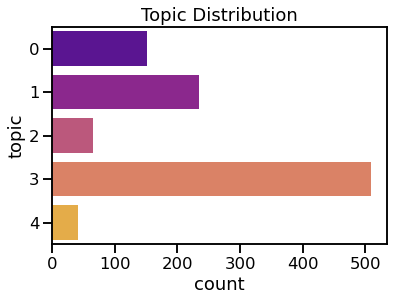

In [162]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.set_context('talk') 
sns.countplot(y=norm_emails['topic'], palette="plasma")
plt.title('Topic Distribution');

In [163]:
import random
for i in range(6):
    random_word_id = random.randint(0,12)
    print(cv.get_feature_names()[random_word_id])

absence
abreast
abn
abroad
aaldous
ab


Use the components index to find a single topic for each array as an example

In [164]:
single_topic = lda.components_[2]

In [165]:
single_topic.argsort()

array([1663,  553, 3511, ..., 6015, 3144, 1179])

In [166]:
single_topic[100]
#Top 10 words for this topic at the number 1055 email.

single_topic.argsort()[-10:]

top_word_indices = single_topic.argsort()[-10:]
#Get the text information of this top 10 words

for index in top_word_indices:
    print(cv.get_feature_names()[index])

0.20217722737797286

array([6048, 5630, 1178, 4318,  811, 3847, 3266, 6015, 3144, 1179])

stock
security
companies
oil
business
market
investment
statements
information
company



## Deep learning Methods

### Implementing a word2vec model using a CBOW (Continuous Bag of Words) neural network architecture


#### Build the corpus vocabulary( use the normolize X matrix previously)

In [169]:
norm_X.shape

(1000,)

In [170]:
from keras.preprocessing import text
from keras.utils import np_utils
from keras.preprocessing import sequence

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_X)
word2id = tokenizer.word_index

word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_X]

vocab_size = len(word2id)
embed_size = 100
window_size = 2

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])

Vocabulary Size: 15177
Vocabulary Sample: [('enron', 1), ("'", 2), ('ect', 3), ('subject', 4), ('vince', 5), ('com', 6), ('hou', 7), ('please', 8), ('kaminski', 9), ('would', 10)]


### Build (context_words, target_word) pair generator

In [171]:
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []            
            start = index - window_size
            end = index + window_size + 1
            
            context_words.append([words[i] 
                                 for i in range(start, end) 
                                 if 0 <= i < sentence_length 
                                 and i != index])
            label_word.append(word)

            x = sequence.pad_sequences(context_words, maxlen=context_length)
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)

In [172]:
i = 0
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])
    
        if i == 10:
            break
        i += 1

Context (X): ['subject', 'tell', 'sluts', 'removed'] -> Target (Y): cam
Context (X): ['tell', 'cam', 'removed', 'please'] -> Target (Y): sluts
Context (X): ['cam', 'sluts', 'please', 'click'] -> Target (Y): removed
Context (X): ['sluts', 'removed', 'click', 'simply'] -> Target (Y): please
Context (X): ['removed', 'please', 'simply', 'respond'] -> Target (Y): click
Context (X): ['please', 'click', 'respond', 'email'] -> Target (Y): simply
Context (X): ['click', 'simply', 'email', 'address'] -> Target (Y): respond
Context (X): ['simply', 'respond', 'address', 'removed'] -> Target (Y): email
Context (X): ['respond', 'email', 'removed', 'blocked'] -> Target (Y): address
Context (X): ['email', 'address', 'blocked', 'ever'] -> Target (Y): removed
Context (X): ['address', 'removed', 'ever', 'added'] -> Target (Y): blocked


### Build CBOW Deep Network Model

In [173]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))

cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')
print(cbow.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 100)            1517700   
_________________________________________________________________
lambda (Lambda)              (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 15177)             1532877   
Total params: 3,050,577
Trainable params: 3,050,577
Non-trainable params: 0
_________________________________________________________________
None


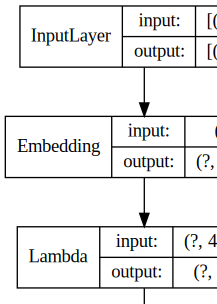

In [174]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

### Get Word Embeddings

In [175]:
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(15176, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
',0.008036,0.023792,0.002024,-0.041122,0.026565,-0.041725,-0.041862,0.047056,0.007548,0.008293,...,0.049855,-0.043912,0.003032,-0.019173,-0.042442,-0.000126,0.020413,-0.035107,0.042566,-0.001673
ect,-0.008831,0.025682,0.002365,0.045508,-0.018489,0.014859,0.041684,-0.023778,-0.019391,0.014879,...,0.010730,-0.033063,-0.043193,0.014330,0.044086,0.040927,0.043833,-0.044263,0.011282,-0.043287
subject,-0.019471,-0.026221,0.019361,0.040115,0.004983,0.036429,-0.000578,-0.042672,-0.004102,-0.007365,...,0.010845,-0.015922,0.003866,-0.023069,-0.043907,0.019750,-0.014535,0.041427,0.035077,-0.018436
vince,-0.019818,0.013468,-0.038594,-0.017822,-0.003330,0.044869,-0.041612,0.037975,-0.014966,-0.033010,...,0.004188,-0.033888,0.040005,0.025509,-0.044187,0.005174,-0.016263,0.013015,-0.013582,0.041587
com,0.016095,0.019910,-0.004204,0.039569,0.025022,-0.020122,-0.014786,-0.005085,-0.004139,0.036077,...,-0.022290,0.013701,-0.028338,-0.014771,-0.010869,-0.013040,0.003796,-0.026331,0.008813,-0.022632


### Build a distance matrix to view the most similar words (contextually)

In [145]:
from sklearn.metrics.pairwise import euclidean_distances

# compute pairwise distance matrix
distance_matrix = euclidean_distances(weights)
print(distance_matrix.shape)

# view contextually similar words
similar_words = {search_term: [id2word[idx] for idx in distance_matrix[word2id[search_term]-1].argsort()[1:6]+1] 
                   for search_term in ['march', 'options', 'vince', 'real', 'conference', 'try', 'secretary','something']}

similar_words

(16096, 16096)


{'march': ['january', 'april', '23', 'feb', 'february'],
 'options': ['real', 'presentation', 'analysis', 'recovery', 'grade'],
 'vince': ['week', 'last', 'thank', 'next', 'wanted'],
 'real': ['ball', 'partners', 'wide', 'theory', 'write'],
 'conference': ['presentation', 'call', 'electric', 'professor', 'real'],
 'try': ['tough', 'rest', 'result', 'keep', 'buying'],
 'secretary': ['certainly', 'uc', 'worked', 'videoconferencing', 'clean'],
 'something': ['immediately', 'worried', 'inn', 'cheers', 'personnel']}

### Implementing a word2vec model using a skip-gram neural network architecture

In [176]:
from keras.preprocessing import text

tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_X)

word2id = tokenizer.word_index
id2word = {v:k for k, v in word2id.items()}

vocab_size = len(word2id) + 1 
embed_size = 100

wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_X]
print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])


Vocabulary Size: 15177
Vocabulary Sample: [('enron', 1), ("'", 2), ('ect', 3), ('subject', 4), ('vince', 5), ('com', 6), ('hou', 7), ('please', 8), ('kaminski', 9), ('would', 10)]


 Get the same result of by using  word2vec CBOW

#### Build and View sample skip grams ((word1, word2) -> relevancy)

In [177]:
from keras.preprocessing.sequence import skipgrams

# generate skip-grams
skip_grams = [skipgrams(wid, vocabulary_size=vocab_size, window_size=10) for wid in wids]

# view sample skip-grams
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(10):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          id2word[pairs[i][0]], pairs[i][0], 
          id2word[pairs[i][1]], pairs[i][1], 
          labels[i]))

(subject (4), hitch (10486)) -> 0
(azcple (8487), shows (1928)) -> 1
(link (379), email (14)) -> 1
(email (14), tell (757)) -> 1
(right (196), lei (8485)) -> 1
(way (159), email (14)) -> 1
(candice (4362), lando (9482)) -> 0
(respond (429), scroll (5152)) -> 1
(central (1010), click (132)) -> 1
(signup (8489), refinancing (11195)) -> 0


#### Build Skip-gram Deep Network Model

In [157]:
from keras.layers import Merge
from keras.layers.core import Dense, Reshape
from keras.layers.embeddings import Embedding
from keras.models import Sequential

word_model = Sequential()
word_model.add(Embedding(vocab_size, embed_size,
                         embeddings_initializer="glorot_uniform",
                         input_length=1))
word_model.add(Reshape((embed_size, )))

context_model = Sequential()
context_model.add(Embedding(vocab_size, embed_size,
                  embeddings_initializer="glorot_uniform",
                  input_length=1))
context_model.add(Reshape((embed_size,)))

model = Sequential()
model.add(Merge([word_model, context_model], mode="dot"))
model.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")
print(model.summary())

ImportError: cannot import name 'Merge' from 'keras.layers' (/Users/jeanbai/opt/anaconda3/lib/python3.8/site-packages/keras/layers/__init__.py)

In [158]:
''''''
def test_merge_dot():
    i1 = layers.Input(shape=(4,))
    i2 = layers.Input(shape=(4,))
    o = layers.dot([i1, i2], axes=1)
    assert o._keras_shape == (None, 1)
    model = models.Model([i1, i2], o)

    dot_layer = layers.Dot(axes=1)
    o2 = dot_layer([i1, i2])
    assert dot_layer.output_shape == (None, 1)

    x1 = np.random.random((2, 4))
    x2 = np.random.random((2, 4))
    out = model.predict([x1, x2])
    assert out.shape == (2, 1)
    expected = np.zeros((2, 1))
    expected[0, 0] = np.dot(x1[0], x2[0])
    expected[1, 0] = np.dot(x1[1], x2[1])
    assert_allclose(out, expected, atol=1e-4)

    # Test with negative tuple of axes.
    o = layers.dot([i1, i2], axes=(-1, -1))
    assert o._keras_shape == (None, 1)
    model = models.Model([i1, i2], o)
    out = model.predict([x1, x2])
    assert out.shape == (2, 1)
    assert_allclose(out, expected, atol=1e-4) 
''''''

''

''

## Unsupervised NLP /spaCy

we can combine the CountVectorizer and TfidTransformer steps into one using TfidVectorizer:

In [159]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [178]:
from sklearn.model_selection import train_test_split

X = emails['text']  
y = emails['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [176]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer()
X_train_tfidf = tv.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(670, 12379)

In [189]:
type(X_train_tfidf)


scipy.sparse.csr.csr_matrix

In [190]:
type(y_train)

pandas.core.series.Series

### Train a Classifier
SVM classifier that's similar to SVC, called LinearSVC. LinearSVC handles sparse input better, and scales well to large numbers of samples.

In [183]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)

ValueError: Unknown label type: 'unknown'

In [112]:
from sklearn.pipeline import Pipeline

In [ ]:
text_clf = Pipleline([("tfidf", TfidfVectorizer()),("clf", LinearSVC())])

In [ ]:
text_clf.fit(X_train,y_train)

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

In [ ]:
text_clf.prediction(["congrate,"])